#Paquetes necesarios


In [71]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [72]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 


Convierte a grises para procesar


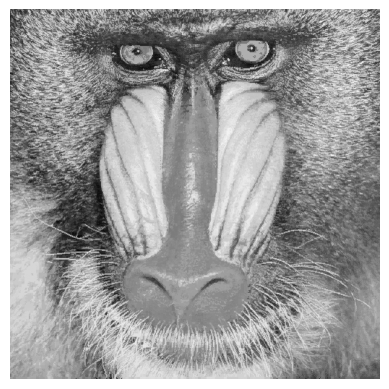

In [73]:
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Muestra, indicando el mapa de color de grises con matplotlib
plt.figure()
#Eliminamos etiquetas de los ejes
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()


Canny, detector de contornos multietapa. Tratado en las sesiones de teoría (tema 4)


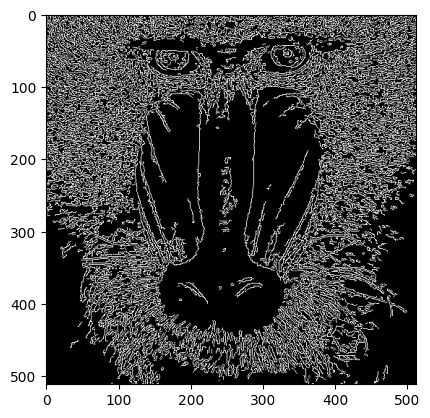

In [74]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
#print(canny) #Muestra contenido, valores 0 o 255
#Visualiza resultado
plt.imshow(canny, cmap='gray') 
plt.show()


Contar el número de píxeles no nulos por columna y visualizar


canny shape (512, 512)


(0.0, 512.0)

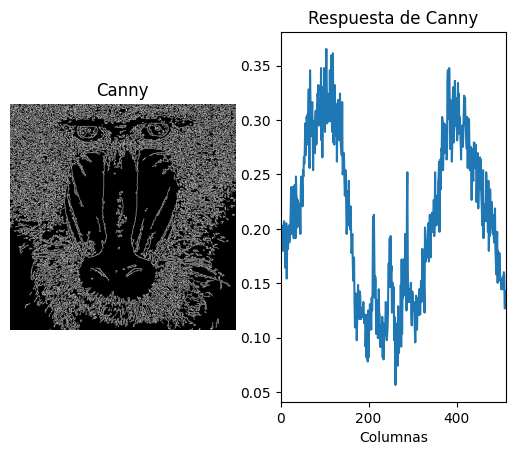

In [75]:
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * canny.shape[1])
print("canny shape",canny.shape)
#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el máximo para filas y columnas (uno para cada) y muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95\*máximo.

Maximo de pixeles blancos por fila  220.0
Maximo de pixeles blancos por columna  187.0
Máximo porcentaje de pixeles blancos por fila: 42.96875 %
Máximo porcentaje píxeles blancos por columna: 36.5234375 %
Número de filas con píxeles blancos >= 95% del máximo: 2
Número de columnas con píxeles blancos >= 95% del máximo: 6


(0.0, 512.0)

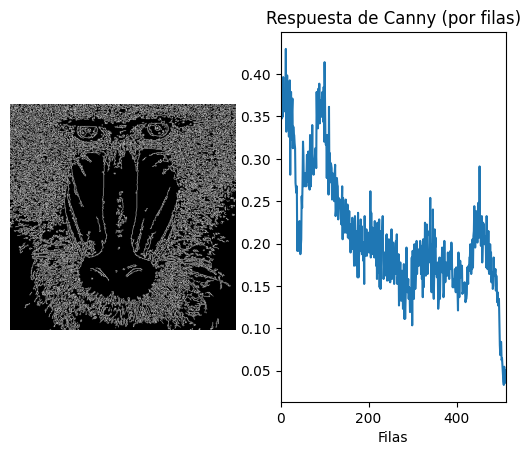

In [76]:
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
# Normaliza en base al valor máximo del píxel (255)
rows = row_counts[:,0] / (255 * canny.shape[0])
    
# Determina el máximo de píxeles blancos por fila y columna
max_row = np.max(rows)
max_col = np.max(cols)

max_pixel_row= max_row *512
max_pixel_col= max_col *512

print("Maximo de pixeles blancos por fila ", max_pixel_row)
print("Maximo de pixeles blancos por columna ", max_pixel_col)
# Determina el número de filas con un número de píxeles blancos mayor o igual que el 95% del máximo
threshold_row = 0.95 * max_row
threshold_col = 0.95 * max_col
rows_above_threshold = np.sum(rows >= threshold_row)
cols_above_threshold = np.sum(cols >= threshold_col)

print(f"Máximo porcentaje de pixeles blancos por fila: {max_row *100} %")
print(f"Máximo porcentaje píxeles blancos por columna: {max_col*100} %")
print(f"Número de filas con píxeles blancos >= 95% del máximo: {rows_above_threshold}")
print(f"Número de columnas con píxeles blancos >= 95% del máximo: {cols_above_threshold}")

# Muestra gráficamente la distribución de píxeles blancos por fila y por columna
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(canny, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny (por filas)")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
# Rango en x definido por el número de filas
plt.xlim([0, canny.shape[0]]) 

    



Sobel. Cuando hay un borde, el valor de intensidad de los píxeles cercanos cambia de forma notable, calcular las derivadas proporciona una evidencia de dicho cambio. El operador de Sobel aproxima el cálculo de la derivada aplicando un kernel de tamaño impar basado en el patrón [1 2 1].


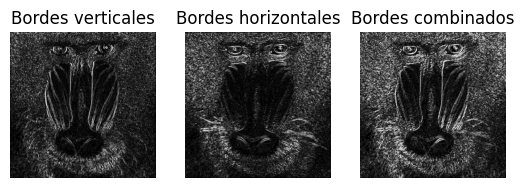

In [77]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Bordes verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Bordes horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Bordes combinados')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
#plt.imshow(sobel, cmap='gray') #Prueba sin convertir escala
plt.show()

Umbralizado de una imagen


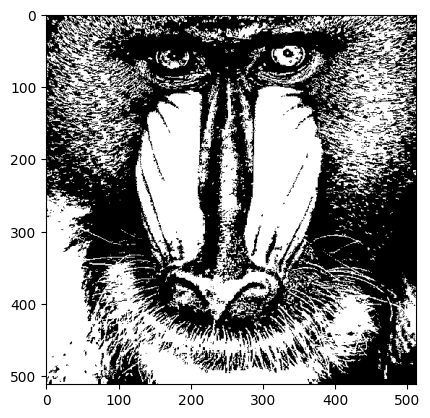

In [78]:
#Define valor umbral
valorUmbral = 130 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(gris, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

El histograma de una imagen aporta información sobre el valor de umbral a elegir para ciertas situaciones


(0.0, 256.0)

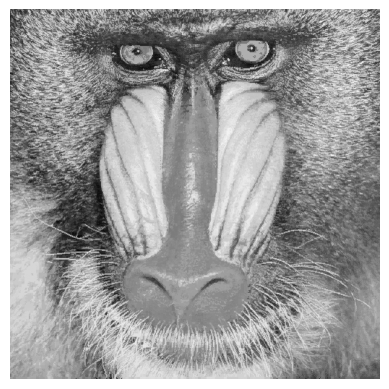

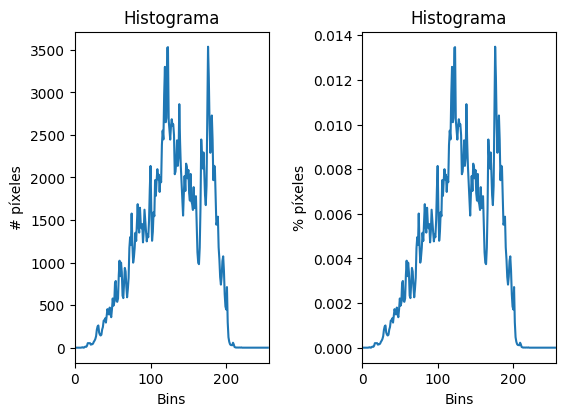

In [79]:
#Cálculo del histograma de una imagen en escala de grises
hist = cv2.calcHist([gris], [0], None, [256], [0, 256])

plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray')

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

#Normaliza el histograma en base al número de píxeles y lo muestra
hist /= hist.sum()

plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("% píxeles")
plt.tight_layout(pad=3.0) #separación entre plots
plt.plot(hist)
plt.xlim([0, 256])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95\*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?


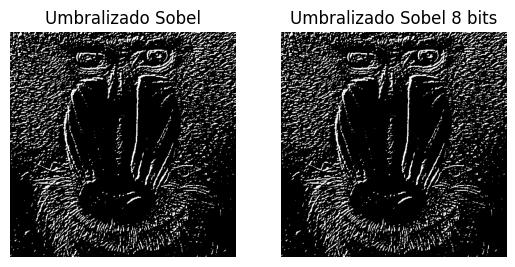

In [80]:
#Define valor umbral
valorUmbral = 80 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
sobel8 = np.uint8(imagenUmbralizada)
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title('Umbralizado Sobel')
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title('Umbralizado Sobel 8 bits')
plt.imshow(sobel8, cmap='gray') #Visualiza con mapa de color gris
plt.show()

Maximo de pixeles blancos por fila  157.0
Maximo de pixeles blancos por columna  176.0
Máximo porcentaje de pixeles blancos por fila: 30.6640625 %
Máximo porcentaje píxeles blancos por columna: 34.375 %
Número de filas con píxeles blancos >= 95% del máximo: 2
Número de columnas con píxeles blancos >= 95% del máximo: 1
[0, 200, 300, 400, 500, 52, 83]
[127]


(0.0, 512.0)

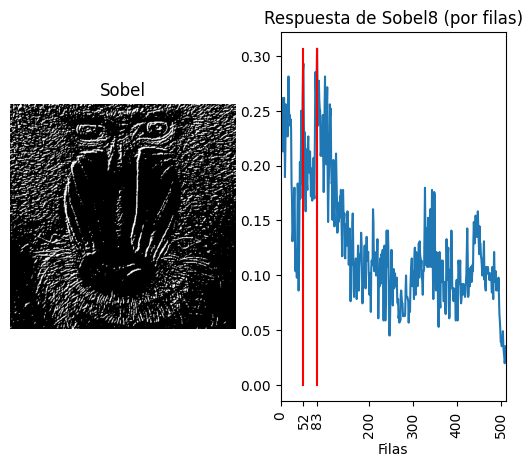

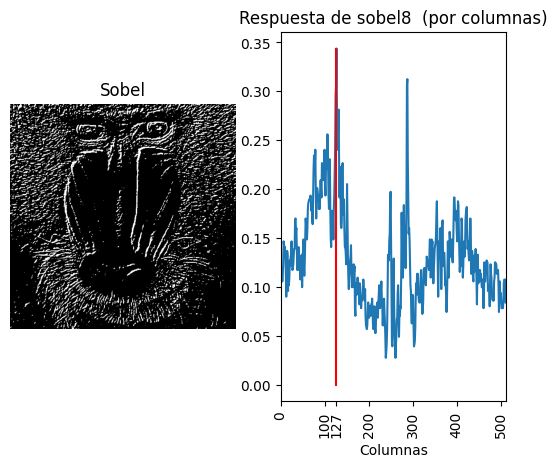

In [81]:
col_counts = cv2.reduce(sobel8, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * sobel8.shape[1])

row_counts = cv2.reduce(sobel8, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
# Normaliza en base al valor máximo del píxel (255)
rows = row_counts[:,0] / (255 * sobel8.shape[0])
    
# Determina el máximo de píxeles blancos por fila y columna
max_row = np.max(rows)
max_col = np.max(cols)

max_pixel_row= max_row *512
max_pixel_col= max_col *512

print("Maximo de pixeles blancos por fila ", max_pixel_row)
print("Maximo de pixeles blancos por columna ", max_pixel_col)
# Determina el número de filas con un número de píxeles blancos mayor o igual que el 95% del máximo
threshold_row = 0.95 * max_row
threshold_col = 0.95 * max_col
rows_above_threshold = np.sum(rows >= threshold_row)
cols_above_threshold = np.sum(cols >= threshold_col)

print(f"Máximo porcentaje de pixeles blancos por fila: {max_row *100} %")
print(f"Máximo porcentaje píxeles blancos por columna: {max_col*100} %")
print(f"Número de filas con píxeles blancos >= 95% del máximo: {rows_above_threshold}")
print(f"Número de columnas con píxeles blancos >= 95% del máximo: {cols_above_threshold}")

rows_cords = np.where(rows >= threshold_row)

cols_cords = np.where(cols >= threshold_col)





# Muestra gráficamente la distribución de píxeles blancos por fila y por columna
row_chart = plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel")
plt.imshow(sobel8, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Respuesta de Sobel8 (por filas)")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
for row in rows_cords:
    plt.plot((row, row), (0, max_row),'red') 


x_sticks=[0,200,300,400,500]
x_sticks.extend(rows_cords[0].data)
print(x_sticks)
plt.xticks(ticks=x_sticks, labels=x_sticks, rotation=90)
# Rango en x definido por el número de filas
plt.xlim([0, sobel8.shape[0]]) 



#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por columna
#Suma los valores de los pixeles por columna

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel")
plt.imshow(sobel8, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de sobel8  (por columnas)")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
for  col in cols_cords:
    plt.plot((col, col), (0, max_col),'red' ) 

print(cols_cords[0])
x_sticks=[0,100,200,300,400,500]
x_sticks.extend(cols_cords[0].data)
plt.xticks(ticks=x_sticks, labels=x_sticks, rotation=90)
#Rango en x definido por las columnas
plt.xlim([0, sobel8.shape[1]])



Diferencia de imágenes


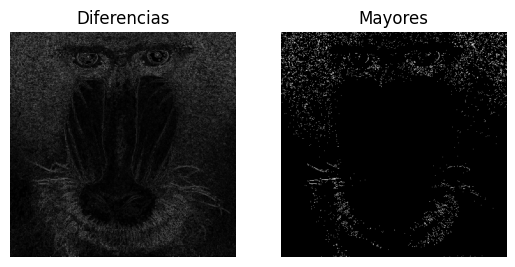

In [82]:
#Calcula la diferencia entre dos imágenes
#Utiliza la imagen original y la obtenida tras aplicar la gaussiana (creada en la celda dedicada a Sobel)
dif = cv2.absdiff(gris, ggris)

#Visualiza
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Diferencias")
plt.axis("off")
plt.imshow(dif, cmap='gray') 

#Zonas de mayor diferencia tras aplicar umbral
res, imgdif = cv2.threshold(dif, 30, 255, cv2.THRESH_BINARY)
#Visualiza
plt.subplot(1, 2, 2)
plt.title("Mayores")
plt.axis("off")
plt.imshow(imgdif, cmap='gray') 
plt.show()


Webcam y sustracción de fotogramas


In [83]:
vid = cv2.VideoCapture(0)

#Marca de inicio
disponible = 0 
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if disponible > 0:
            dif = cv2.absdiff(frame, pframe)        
            # Muestra resultado
            cv2.imshow('Diferencia', dif)        

        else:
            disponible = 1

        #Copia fotograma actual para la diferencia en el siguiente forograma
        pframe = frame.copy()
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Webcam y sustracción de modelo del fondo


In [84]:
vid = cv2.VideoCapture(0)

# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        
        #Con un segundo parámerto se puede definir máscara con zonas a actualizar
        objetos = eliminadorFondo.apply(framem)
        #objetos = eliminadorFondo.apply(framem, objetos, 0)  #No actualiza el fondo
        # Obtiene fondo
        background = eliminadorFondo.getBackgroundImage()

        # Muestra resultado
        cv2.imshow('Fotograma', objetos)
        # Muestra fondo
        cv2.imshow('Fondo', background)
  
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [85]:
#Interactivo
# Presiona "q"  o "e" en el teclado para aumentar y disminuir celdas
# Presiona "w" o "s" posición de los filtros

def aplicar_pop_art(frame, index):
    color_maps = [
        cv2.COLORMAP_AUTUMN, 
        cv2.COLORMAP_BONE, 
        #cv2.COLORMAP_JET,
        cv2.COLORMAP_WINTER, 
        cv2.COLORMAP_OCEAN, 
        cv2.COLORMAP_SUMMER, 
        cv2.COLORMAP_SPRING, 
        cv2.COLORMAP_COOL, 
        #cv2.COLORMAP_HSV, 
        cv2.COLORMAP_PINK, 
        #cv2.COLORMAP_PARULA, 
        #cv2.COLORMAP_MAGMA, 
        cv2.COLORMAP_INFERNO, 
        #cv2.COLORMAP_PLASMA, 
        cv2.COLORMAP_VIRIDIS, 
        cv2.COLORMAP_CIVIDIS, 
        cv2.COLORMAP_TWILIGHT, 
        cv2.COLORMAP_TWILIGHT_SHIFTED,
        #cv2.COLORMAP_TURBO, 
        cv2.COLORMAP_DEEPGREEN]

    # Aplicar el map de color usando el índice
    color_map = color_maps[index % len(color_maps)]
    
    # Retorna el frame con el map de color aplicado
    return cv2.applyColorMap(frame, color_map)

def remarcar_borde(img):
    #Tonalidades de grises
    gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #suavisado gaussiano
    ggris = cv2.GaussianBlur(gris, (3, 3), 0)
    
    #Calcula en ambas direcciones (horizontal y vertical)
    sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
    sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
    
    #Combina ambos resultados
    return cv2.add(sobelx, sobely)



def posicionar_celdas(alto, ancho, num_filas, num_columnas, espacio):
    cel_list = []
    
    # Calcula el tamaño disponible para cada celda después de considerar los espacios
    total_alto = alto - (num_filas - 1) * espacio
    total_ancho = ancho - (num_columnas - 1) * espacio
    
    # Calcula el tamaño de cada celda de forma que ocupe todo el espacio
    cel_alto = total_alto // num_filas
    cel_ancho = total_ancho // num_columnas
    
    for fila in range(num_filas):
        for columna in range(num_columnas):
            # Posición inicial para cada marco, considerando el espacio
            inicio_x = columna * (cel_ancho + espacio)
            inicio_y = fila * (cel_alto + espacio)
            
            # Añadir la posición y el tamaño del marco
            cel_list.append({
                'pos': (inicio_y, inicio_x),
                'size': (cel_alto, cel_ancho)  # (alto, ancho) para la imagen redimensionada
            })
    
    return cel_list


def actualizar_collage(collage, cell_list, frame, extra_idx):
    
    # Limpiar el collage
    collage[:, :] = 0
    
    for idx, item in enumerate(cell_list):
        pos = item['pos']
        size = item['size']
        y, x = pos
        h, w = size
        
        # Verificar si el tamaño del frame no excede el collage
        if y + h > collage.shape[0] or x + w > collage.shape[1]:
            continue
        
        # Redimensionar el frame a las dimensiones del marco
        resized_frame = cv2.resize(frame, (w, h))
        
        # Aplicar detención de bordes y convertirlo a 8 bits
        border_frame = np.uint8(remarcar_borde(resized_frame))

        # Aplicar el mapeo de color para darle estilo "pop art"
        popart_frame = aplicar_pop_art(border_frame, idx+abs(extra_idx))
        
        # Colocar el frame en el collage
        collage[y:y + h, x:x + w] = popart_frame

# Captura de video
vid = cv2.VideoCapture(0)

# Dimensiones de la cámara
ancho = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
alto = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Forzar a mitad de resolución para ocupar menos pantalla
ancho = int(ancho / 2)
alto = int(alto / 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, ancho)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, alto)

# Parámetros de la cuadrícula
num_filas = 4
num_columnas = 4
espacio = 2  # Espacio constante entre marcos

# Imagen conjunta 2x original
collage = np.zeros((alto * 2, ancho * 2, 3), dtype=np.uint8)

# Posicionar las celdas
cel_list = posicionar_celdas(alto * 2, ancho * 2, num_filas, num_columnas, espacio)
extra_idx = 0

while True:
    ret, frame = vid.read()
    if not ret:
        break

    # Actualizar el collage con el nuevo frame
    actualizar_collage(collage, cel_list, frame, extra_idx)

    cv2.imshow('Pop Art Webcam', collage)

    # Tiempo de espera entre cada capturas
    key =  cv2.waitKey(20)
    
    #Aumentar por 2 el numero de filas y columnas
    if key == ord('e') and (num_filas < 16):
        num_filas *= 2
        num_columnas *= 2
        cel_list = posicionar_celdas(alto * 2, ancho * 2, num_filas, num_columnas, espacio)
    
    #Disminuir entre 2 el numero de filas y columnas
    if key == ord('q') and (num_filas > 1):
        num_filas //= 2
        num_columnas //= 2
        cel_list = posicionar_celdas(alto * 2, ancho * 2, num_filas, num_columnas, espacio)
    
    #Aumentar el indice del filtro de la imagen
    if key == ord('w'):
        extra_idx +=1

    #Disminuir el indice del filtro de la imagen
    if key == ord('s'):
        extra_idx -=1
        
    #Terminar ejecución
    if key == 27:
        break

vid.release()
cv2.destroyAllWindows()


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) plantear una reinterpretación de la parte de procesamiento de la imagen tomando como punto de partida alguna de dichas instalaciones.


In [98]:
import cv2
import numpy as np

# Inicializa la captura de video (webcam)
vid = cv2.VideoCapture(0)

# Comprobamos si la cámara está abierta
if not vid.isOpened():
    print("No se puede acceder a la cámara.")
    exit()

# Inicialización
ret, frame = vid.read()
if not ret:
    print("No se pudo leer el fotograma inicial.")
    vid.release()
    exit()

prev_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Primer fotograma en escala de grises
frame_count = 0
current_rect = None
disponible = 0  # Variable para iniciar la comparación en el segundo fotograma

while True:
    ret, frame = vid.read()
    if not ret:
        print("No se pudo leer el siguiente fotograma.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convertir el fotograma a escala de grises

    # Solo calculamos la diferencia a partir del segundo fotograma en adelante
    if disponible > 0:
        diff = cv2.absdiff(prev_gray, gray)  # Diferencia con el fotograma anterior

        # Aplicamos un desenfoque gaussiano para reducir el ruido en la diferencia
        blurred_diff = cv2.GaussianBlur(diff, (9, 9), 0)

        # Umbralización para detectar diferencias de movimiento
        _, thresh = cv2.threshold(blurred_diff, 25, 255, cv2.THRESH_BINARY)

        # Dilatar para unir áreas de movimiento cercanas y mejorar la detección
        dilated = cv2.dilate(thresh, None, iterations=5)

        # Encontrar contornos en la imagen dilatada
        contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Actualizamos el rectángulo cada 10 fotogramas para mayor estabilidad
        if frame_count % 10 == 0:
            if contours:
                # Si hay contornos, los combinamos en un solo rectángulo envolvente
                all_points = np.vstack(contours)  # Combina todos los puntos de los contornos
                x, y, w, h = cv2.boundingRect(all_points)  # Obtiene el rectángulo envolvente
                current_rect = (x, y, w, h)

        # Dibujar el rectángulo alrededor de las áreas blancas
        if current_rect:
            cv2.rectangle(frame, (current_rect[0], current_rect[1]),
                          (current_rect[0] + current_rect[2], current_rect[1] + current_rect[3]),
                          (0, 255, 0), 2)

        # Mostrar la imagen de diferencias (áreas blancas detectadas)
        cv2.imshow("Diferencia", diff)

    # Actualizar el fotograma anterior (solo después de procesar el primer fotograma)
    prev_gray = gray.copy()
    disponible = 1  # Marca que el primer fotograma ya ha sido procesado

    # Mostrar el fotograma con la detección de movimiento
    cv2.imshow("Detección de movimiento", frame)

    # Aumentar el contador de fotogramas para las actualizaciones
    frame_count += 1

    # Salir si presionamos la tecla ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura y cierra las ventanas
vid.release()
cv2.destroyAllWindows()
